9.097729183704374


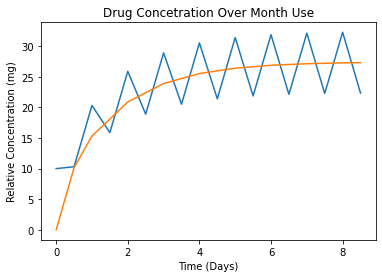

In [26]:
from matplotlib import pyplot as plt

def halflife(hl, dose, time, initial=0):
    # Half-life formula
    current_con = (initial+dose) * ((1/2)**(time/hl))
    return current_con

def concentration_over_time(hl, dose, time_interval=24, time_period=30, initial=0):
    
    dose_schedule = [i for i in range(0, time_period*24+1, int(24*(time_interval/24)))]
    
    i = 1
    concentration_interval = [dose, halflife(hl, dose, time_interval, initial)]
    while len(dose_schedule)*2 >= len(concentration_interval):
        concentration_interval.append(concentration_interval[i] + dose)
        concentration_interval.append(halflife(hl, concentration_interval[i+1], time_interval, initial))
        i += 2

    proto_time_points = list(range((len(dose_schedule)+1)*2))
    time_points = [i/2**(24/time_interval) for i in proto_time_points]
    
    steady_state_plot = [0]+[(concentration_interval[i] + concentration_interval[i+1])/2 for i in range(len(concentration_interval)-1)]
    
    return time_points, concentration_interval, steady_state_plot

drug_concentration = concentration_over_time(27, 10, time_interval=48, time_period=7)
steady_state = max(drug_concentration[2])
print(steady_state)
drug_concentration = concentration_over_time(27, 10, time_interval=24, time_period=7, initial=steady_state)

#hl = input("Enter drug half-life (hours): ")
#dose = input("Enter drug dose: ")
#time = input("Enter time since dose (hours): ")
#time_period = input("Enter dose frequency (days): ")

plt.plot(drug_concentration[0], drug_concentration[1])
plt.plot(drug_concentration[0], drug_concentration[2])
plt.title("Drug Concetration Over Month Use")
plt.xlabel("Time (Days)")
plt.ylabel("Relative Concentration (mg)")
plt.show()